In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
import statistics
import time
import warnings
warnings.filterwarnings('ignore')
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
#from pandas_profiling import ProfileReport
#!pip install ipywidgets
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact
from plotly.offline import plot, iplot
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.express as px

pd.set_option('max_columns',None)
pd.set_option('max_rows',None)
t_total = time.perf_counter()

In [61]:
params = {'figure.figsize': [10,10],
          'axes.labelsize': 16,
          'axes.titlesize':18,
          'font.size': 16,
          'legend.fontsize': 12,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12
    }

plt.rcParams.update(params)

In [62]:
col_list = ["Post","Data","Categoria","Área","Título Representativo","Mídia","SEO","Links I.","Links E.",
            "Complexidade","Introdução","Analogias","Interação","Siglas","Visualizações"]

df = pd.read_excel("dataset-pgc-manual.xlsx", usecols=col_list)

df2 = pd.read_excel("dataset-pln.xlsx")

df = df.join(df2)

print(df.tail(5))

                                                  Post       Data  \
146   O efeito Hawthorne e a nossa vontade de melhorar 2020-08-03   
147     Carne caramelizada: uma receita não-enzimática 2020-08-10   
148                Participação de animais em pesquisa 2020-08-17   
149  Como saber a situação da sua cidade frente ao ... 2020-08-24   
150                                  O futuro da carne 2020-08-31   

                    Categoria        Área  Título Representativo  Mídia  SEO  \
146  O que que a ciência tem?  Psicologia                      1      1    1   
147  O que que a ciência tem?    Biologia                      0      3    1   
148          Ciência ao redor    Biologia                      1      1    1   
149                    Outros  Matemática                      1     15    1   
150  O que que a ciência tem?    Biologia                      0      1    1   

     Links I.  Links E.  Complexidade  Introdução  Analogias  Interação  \
146         1         2      

In [63]:
import datetime
#dt = datetime.datetime.today()
dt = datetime.datetime(year=2020,month=9,day=1, hour=0, minute=0, second=0, microsecond=0, tzinfo=None, fold=0)
print(dt)
# 2020-03-01 00:00:00

dias = []

for i in range(df['Data'].size):
    dias.append((dt-df['Data'][i]).days)

print(dias)
df['Dias'] = dias
df.drop('Data',axis=1,inplace=True)

2020-09-01 00:00:00
[818, 810, 809, 806, 778, 776, 773, 771, 769, 768, 767, 766, 764, 762, 759, 757, 755, 752, 750, 747, 743, 740, 736, 733, 729, 726, 722, 719, 715, 712, 708, 705, 701, 698, 694, 691, 687, 684, 680, 677, 676, 673, 670, 666, 656, 652, 645, 638, 616, 610, 610, 603, 596, 589, 582, 575, 568, 561, 554, 540, 533, 529, 526, 520, 514, 512, 505, 502, 498, 491, 488, 484, 478, 470, 463, 456, 449, 442, 436, 430, 428, 421, 414, 409, 407, 400, 393, 386, 379, 372, 365, 358, 351, 344, 337, 330, 327, 323, 316, 309, 302, 295, 288, 281, 274, 267, 260, 253, 246, 245, 239, 232, 225, 218, 211, 204, 197, 190, 183, 176, 169, 162, 155, 148, 141, 139, 137, 134, 132, 130, 127, 125, 120, 113, 106, 99, 92, 85, 78, 71, 65, 64, 57, 50, 43, 36, 29, 22, 15, 8, 1]


In [64]:
# Mostrando quantos textos tem de cada Categoria
df.groupby('Categoria').count()[['Post']].sort_values(by=['Post'], ascending=0)

,Post
Categoria,
Ciência ao redor,51
O que que a ciência tem?,48
Profissão Cientista,17
Ciência Pop,10
Sci… what?,10
Outros,8
ABC da ciência,4
Você disse ciência?,3


In [65]:
# Mostrando quantos textos tem de cada Área

df.groupby('Área').count()[['Post']].sort_values(by=['Post'], ascending=0)

,Post
Área,
Biologia,27
Ciência,24
Química,22
Física,21
História,14
Medicina,14
Astronomia,8
Atualidades,7
Matemática,7


In [66]:
@interact
def exibir_df(column=['Visualizações','tamParagraf','tamTitulo','numPal','numPar'], x=(0,3000,5)):
#def exibir(column=list(df.select_dtypes('number')), x=(0,3000)):
    return df.loc[df[column] > x]

interactive(children=(Dropdown(description='column', options=('Visualizações', 'tamParagraf', 'tamTitulo', 'nu…

In [67]:
@interact
def scatter_plot(X=list(df.select_dtypes('number').columns),
                 Y=list(df.select_dtypes('number').columns),
                 HUE=list(df.select_dtypes('number').columns),
                 size=(0,15,1)):
    plt.figure(figsize=(size,size))
    sns.lmplot(x=X, y=Y, hue=HUE, data=df, height=size, legend_out=False, truncate=True)
    plt.grid()

interactive(children=(Dropdown(description='X', options=('Título Representativo', 'Mídia', 'SEO', 'Links I.', …

In [68]:
Q1, Q3 = np.percentile(df['Visualizações'], [25, 75])
print('Primeiro quartil ou Pecentil 25:',Q1)
print('Terceiro quartil ou percentil 75:',Q3)
amplitude_interquartil = Q3 - Q1
print('Amplitude interquartil:',amplitude_interquartil)
limite_inferior = Q1 - (1.5 * amplitude_interquartil)
limite_superior = Q3 + (1.5 * amplitude_interquartil)
print('Limite Inferior:',limite_inferior )
print('Limite Superior:',limite_superior )

# IQR = Interquartile Range

Primeiro quartil ou Pecentil 25: 193.0
Terceiro quartil ou percentil 75: 782.5
Amplitude interquartil: 589.5
Limite Inferior: -691.25
Limite Superior: 1666.75


In [69]:
df[df["Visualizações"] > limite_superior]

,Post,Categoria,Área,Título Representativo,Mídia,SEO,Links I.,Links E.,Complexidade,Introdução,Analogias,Interação,Siglas,Visualizações,numPal,numPar,numSub,numAdj,numVrb,numNEs,numDet,numConj,numAdv,numAdp,numNum,Pergunta,tamMédioParagraf,tamTitulo,refs,Dias
15,"A ciência que você vê, mas não percebe!",Ciência ao redor,Ciência,1,2,1,0,5,1,1,1,1,1,2360,449,10,0.3007,0.0601,0.1359,0.0312,0.1960,0.0423,0.0379,0.0980,0.0000,0,335,39,15,757
30,Todo remédio é uma droga?,O que que a ciência tem?,Medicina,1,1,1,0,1,2,1,0,1,1,2286,292,7,0.3699,0.0685,0.0856,0.0685,0.1781,0.0582,0.0582,0.1096,0.0068,1,387,25,4,708
43,O que é água alcalina?,Você disse ciência?,Química,1,1,1,0,9,2,1,0,1,1,1831,691,11,0.2836,0.0912,0.1071,0.0101,0.1737,0.0434,0.0535,0.1056,0.0130,1,443,22,7,666
46,O que (não) é quântica!,Você disse ciência?,Física,1,1,1,0,15,2,1,0,1,1,2813,1044,14,0.2912,0.0987,0.1140,0.0335,0.1695,0.0460,0.0479,0.1207,0.0067,0,555,23,5,645
67,Resenha – O menino que descobriu o vento,Ciência Pop,Ciência,1,1,1,0,5,1,1,0,0,1,11814,443,11,0.3002,0.0835,0.1151,0.0248,0.2032,0.0384,0.0609,0.0903,0.0023,0,302,40,2,502
68,A quantos graus ferve a água?,Ciência ao redor,Física,1,1,1,0,11,2,1,0,1,1,9032,706,10,0.3272,0.0652,0.1176,0.0708,0.1898,0.0326,0.0496,0.1218,0.0142,1,545,29,4,498
83,"Se o homem foi à Lua em 1969, por que nunca vo...",Ciência ao redor,Astronomia,1,7,1,0,11,2,1,0,1,1,2180,1452,25,0.3815,0.0627,0.0950,0.1935,0.1742,0.0372,0.0461,0.0999,0.0234,1,368,51,1,409
104,Por que usamos “cloro” (ou água sanitária) par...,Ciência ao redor,Química,1,1,1,0,5,2,1,0,1,1,2236,779,9,0.2991,0.0834,0.1168,0.0321,0.1579,0.0436,0.0591,0.1271,0.0013,1,685,68,1,274
105,O que acontece no seu corpo após tomar aquela ...,Ciência ao redor,Química,1,1,0,0,8,2,1,0,1,1,4249,934,15,0.3126,0.0771,0.1178,0.0118,0.1959,0.0418,0.0385,0.1049,0.0182,1,426,61,2,267
127,Os barulhos no céu!,Ciência ao redor,Física,1,1,1,0,4,1,1,0,1,1,1672,654,7,0.3180,0.0688,0.1239,0.0826,0.1682,0.0321,0.0719,0.1086,0.0138,0,811,19,0,134


In [70]:
@interact
def cat_plot(X=['Área','Categoria'],
             KIND=['box','boxen'],
                 size=(0,15,1)):
    sns.catplot(x=X, y='Visualizações', kind=KIND, data=df, height=size)
    sns.stripplot(x=X, y="Visualizações", data=df, color="blue");
    plt.grid()
    plt.xticks(rotation=45)

interactive(children=(Dropdown(description='X', options=('Área', 'Categoria'), value='Área'), Dropdown(descrip…

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Post                   151 non-null    object 
 1   Categoria              151 non-null    object 
 2   Área                   151 non-null    object 
 3   Título Representativo  151 non-null    int64  
 4   Mídia                  151 non-null    int64  
 5   SEO                    151 non-null    int64  
 6   Links I.               151 non-null    int64  
 7   Links E.               151 non-null    int64  
 8   Complexidade           151 non-null    int64  
 9   Introdução             151 non-null    int64  
 10  Analogias              151 non-null    int64  
 11  Interação              151 non-null    int64  
 12  Siglas                 151 non-null    int64  
 13  Visualizações          151 non-null    int64  
 14  numPal                 151 non-null    int64  
 15  numPar

In [72]:
#pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
#from pandas_profiling import ProfileReport
#profile = ProfileReport(df, title='Relatório PGC - Pandas Profiling', html={'style':{'full_width':True}})
#profile.to_file(output_file="Relatorio_PGC.html")

In [73]:
df.drop('Post',axis=1,inplace=True)

In [74]:
@interact
def scatter_plot(X=list(df.select_dtypes('number').columns),
                 Y=list(df.select_dtypes('number').columns[1:])):
    fig = px.scatter(x=df[X], y=df[Y])
    fig.show()

interactive(children=(Dropdown(description='X', options=('Título Representativo', 'Mídia', 'SEO', 'Links I.', …

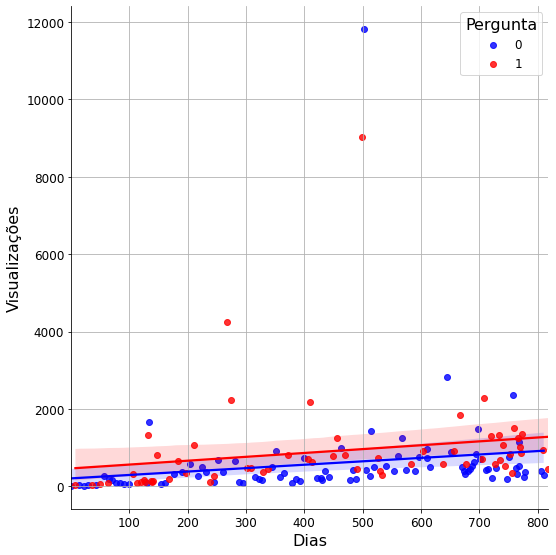

In [75]:
blue_red = ["#0000FF", "#FF0000"];
colors = sns.color_palette(blue_red);
sns.lmplot(x='Dias', y='Visualizações', hue='Pergunta', data=df, palette=colors, height=8, legend_out=False, truncate=True)
plt.grid()

In [76]:
def colorRedBlue(answer):
    colors=[]
    for a in answer:
        if a==1:
            colors.append('red')
        else:
            colors.append('blue')
    return colors

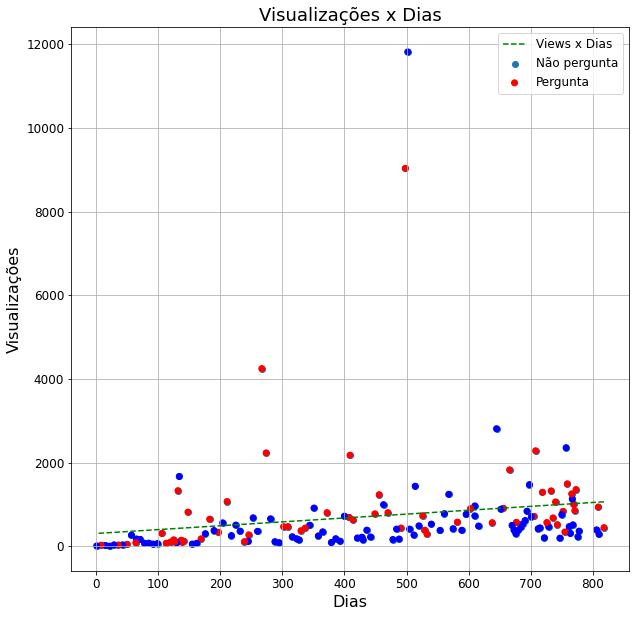

In [77]:
x = df['Dias']
y = df['Visualizações']
cols=colorRedBlue(df['Pergunta'])
plt.scatter(x,y)
plt.title('Visualizações x Dias')
plt.xlabel('Dias')
#plt.gca().invert_xaxis()
plt.ylabel('Visualizações')
plt.scatter(x=x,y=y,c=cols)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"g--")
plt.legend(('Views x Dias','Não pergunta','Pergunta'))
plt.grid()
plt.show()

In [78]:
df_pergunta = list(df.loc[df['Pergunta'] == 1].copy()['Visualizações'])
df_nao_pergunta = list(df.loc[df['Pergunta'] == 0].copy()['Visualizações'])

print(df_pergunta)
print(df_nao_pergunta)

[450, 943, 1360, 859, 1006, 1257, 1497, 347, 837, 521, 1064, 683, 1328, 572, 1295, 2286, 718, 576, 1831, 912, 569, 902, 581, 295, 388, 734, 9032, 441, 808, 1237, 780, 634, 2180, 696, 808, 441, 377, 475, 473, 2236, 4249, 278, 116, 1074, 339, 652, 182, 821, 128, 101, 148, 1333, 113, 159, 107, 77, 311, 89, 49, 36, 30]
[291, 397, 367, 233, 517, 1136, 312, 475, 2360, 761, 200, 469, 208, 445, 425, 714, 1478, 843, 620, 535, 455, 385, 306, 394, 503, 891, 2813, 489, 731, 969, 767, 387, 425, 1246, 785, 383, 534, 494, 1439, 274, 415, 11814, 178, 416, 166, 999, 228, 390, 160, 221, 204, 724, 126, 186, 95, 350, 253, 918, 508, 158, 185, 233, 91, 115, 661, 362, 685, 123, 366, 511, 261, 564, 381, 306, 76, 58, 1672, 95, 70, 57, 80, 79, 167, 180, 272, 38, 39, 9, 24, 13]


In [79]:
x = statistics.mean(df_pergunta)
y = statistics.mean(df_nao_pergunta)
print(f"Média\nPergunta: {round(x,2)}\nNão-pergunta: {round(y,2)}\n")

x = statistics.median(df_pergunta)
y = statistics.median(df_nao_pergunta)
print(f"Mediana\nPergunta: {x}\nNão-pergunta: {y}\n")

#x = statistics.mode(df_pergunta)
#y = statistics.mode(df_nao_pergunta)
#print(f"Moda\nPergunta: {x}\nNão-pergunta: {y}\n")

x = statistics.stdev(df_pergunta)
y = statistics.stdev(df_nao_pergunta)
print(f"Desvio Padrão\nPergunta: {round(x,2)}\nNão-pergunta: {round(y,2)}\n")

x = len(df_pergunta)
y = len(df_nao_pergunta)
print(f"Quantidade\nPergunta: {x}\nNão-pergunta: {y}\n")

Média
Pergunta: 898.7
Não-pergunta: 597.09

Mediana
Pergunta: 634
Não-pergunta: 382.0

Desvio Padrão
Pergunta: 1274.02
Não-pergunta: 1283.7

Quantidade
Pergunta: 61
Não-pergunta: 90



In [80]:
df = pd.get_dummies(df,prefix=['categoria','área'],prefix_sep='-',columns=['Categoria','Área'])

In [81]:
@interact
def bool_statistics(X=list(df.select_dtypes('int64').columns)):
    df_1 = list(df.loc[df[X] == 1].copy()['Visualizações'])
    df_0 = list(df.loc[df[X] == 0].copy()['Visualizações'])
    
    #print(f"Média\n0: {round(statistics.mean(df_0),2)}\n1: {round(statistics.mean(df_1),2)}\n")
    #print(f"Mediana\n0: {statistics.median(df_0)}\n1: {statistics.median(df_1)}\n")
    #print(f"Desvio Padrão\n0: {round(statistics.stdev(df_0),2)}\n1: {round(statistics.stdev(df_1),2)}\n")
    print(f"Quantidade\n0: {len(df_0)}\n1: {len(df_1)}")
    print(X)
    plt.grid(),plt.hist(df[X]),plt.title('Histograma')

interactive(children=(Dropdown(description='X', options=('Título Representativo', 'Mídia', 'SEO', 'Links I.', …

In [57]:
@interact
def int_statistics(X=list(df.select_dtypes('int64'))):
    df_X = list(df[X])
    print(f"Máximo: {max(df_X)}")
    print(f"Mínimo: {min(df_X)}")
    print(f"Média: {round(statistics.mean(df_X),2)}")
    print(f"Mediana: {statistics.median(df_X)}")
    print(f"Desvio Padrão: {round(statistics.stdev(df_X),2)}")
    plt.grid(),plt.hist(df[X]),plt.title('Histograma')

interactive(children=(Dropdown(description='X', options=('Título Representativo', 'Mídia', 'SEO', 'Links I.', …

In [84]:
@interact
def exibir(column1=list(df.select_dtypes('number').columns)):
    corr = str(df[column1].corr(df['Visualizações']))
    return print(f'Correlação entre os atributos: {format(corr)}')

interactive(children=(Dropdown(description='column1', options=('Título Representativo', 'Mídia', 'SEO', 'Links…

In [85]:
# Retirando outliers
#df.drop(df[df.Visualizações > 3000].index, inplace=True)

df.drop(df[df.Visualizações > limite_superior].index, inplace=True)

In [86]:
@interact
def scatter_plot(X=list(df.select_dtypes('number').columns),
                 Y=list(df.select_dtypes('number').columns),
                 HUE=list(df.select_dtypes('number').columns),
                 size=(0,15,1)):
    plt.figure(figsize=(size,size))
    sns.lmplot(x=X, y=Y, hue=HUE, data=df, height=size, truncate=True)
    plt.grid()

interactive(children=(Dropdown(description='X', options=('Título Representativo', 'Mídia', 'SEO', 'Links I.', …

In [87]:
@interact
def scatter_plot(X=list(df.select_dtypes('number').columns),
                 Y=list(df.select_dtypes('number').columns),
                 size=(0,15,1)):
    plt.figure(figsize=(size,size))
    sns.lmplot(x=X, y=Y, data=df, height=size, truncate=True)
    plt.grid()
    corr = str(df[X].corr(df[Y]))
    print(f'Correlação entre os atributos: {format(corr)}')

interactive(children=(Dropdown(description='X', options=('Título Representativo', 'Mídia', 'SEO', 'Links I.', …

In [88]:
@interact
def exibir(column1=list(df.select_dtypes('number').columns),
           column2=list(df.select_dtypes('number').columns)):
    corr = str(df[column1].corr(df[column2]))
    return print(f'Correlação entre os atributos: {format(corr)}')

interactive(children=(Dropdown(description='column1', options=('Título Representativo', 'Mídia', 'SEO', 'Links…

Visualizações                         1.000000
Dias                                  0.535480
refs                                  0.386094
Pergunta                              0.257361
área-Física                           0.190118
área-Astronomia                       0.146514
Analogias                             0.136398
categoria-O que que a ciência tem?    0.122631
categoria-Ciência ao redor            0.121958
numVrb                                0.110357
Complexidade                          0.087936
área-Química                          0.057653
numAdj                                0.057579
área-Medicina                         0.051445
área-Psicologia                       0.048692
área-Matemática                       0.046857
Título Representativo                 0.046591
numDet                                0.042548
categoria-Você disse ciência?         0.035056
Links I.                              0.032453
Siglas                                0.031968
Interação    

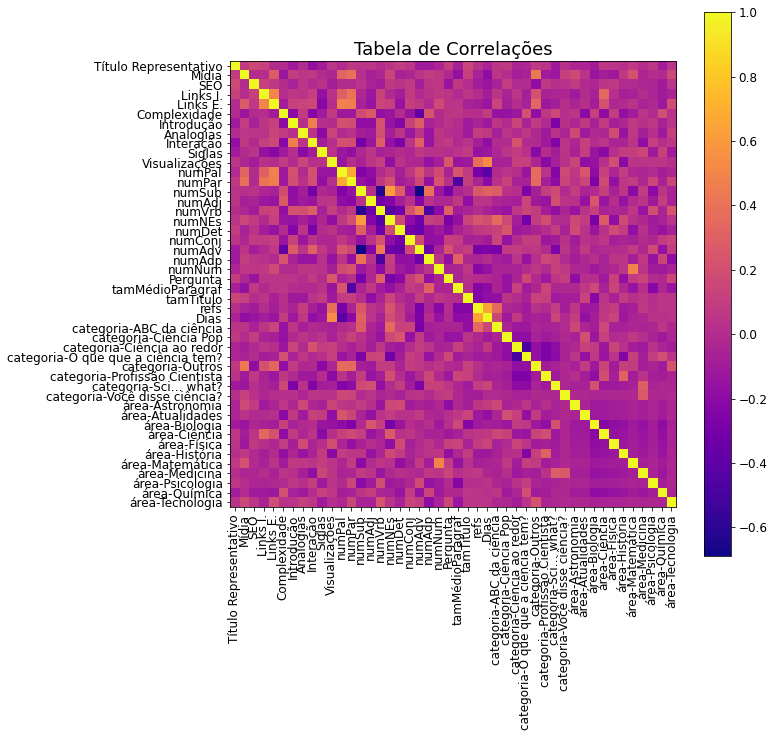

In [92]:
corr = df.corr()
print(corr['Visualizações'].sort_values(ascending=False))
plt.imshow(corr, cmap='plasma', interpolation='none')  
plt.colorbar()
plt.title('Tabela de Correlações')
plt.xticks(range(len(corr)), corr.columns, rotation=90)  
plt.yticks(range(len(corr)), corr.columns);  
plt.savefig("correl.png")
plt.show()

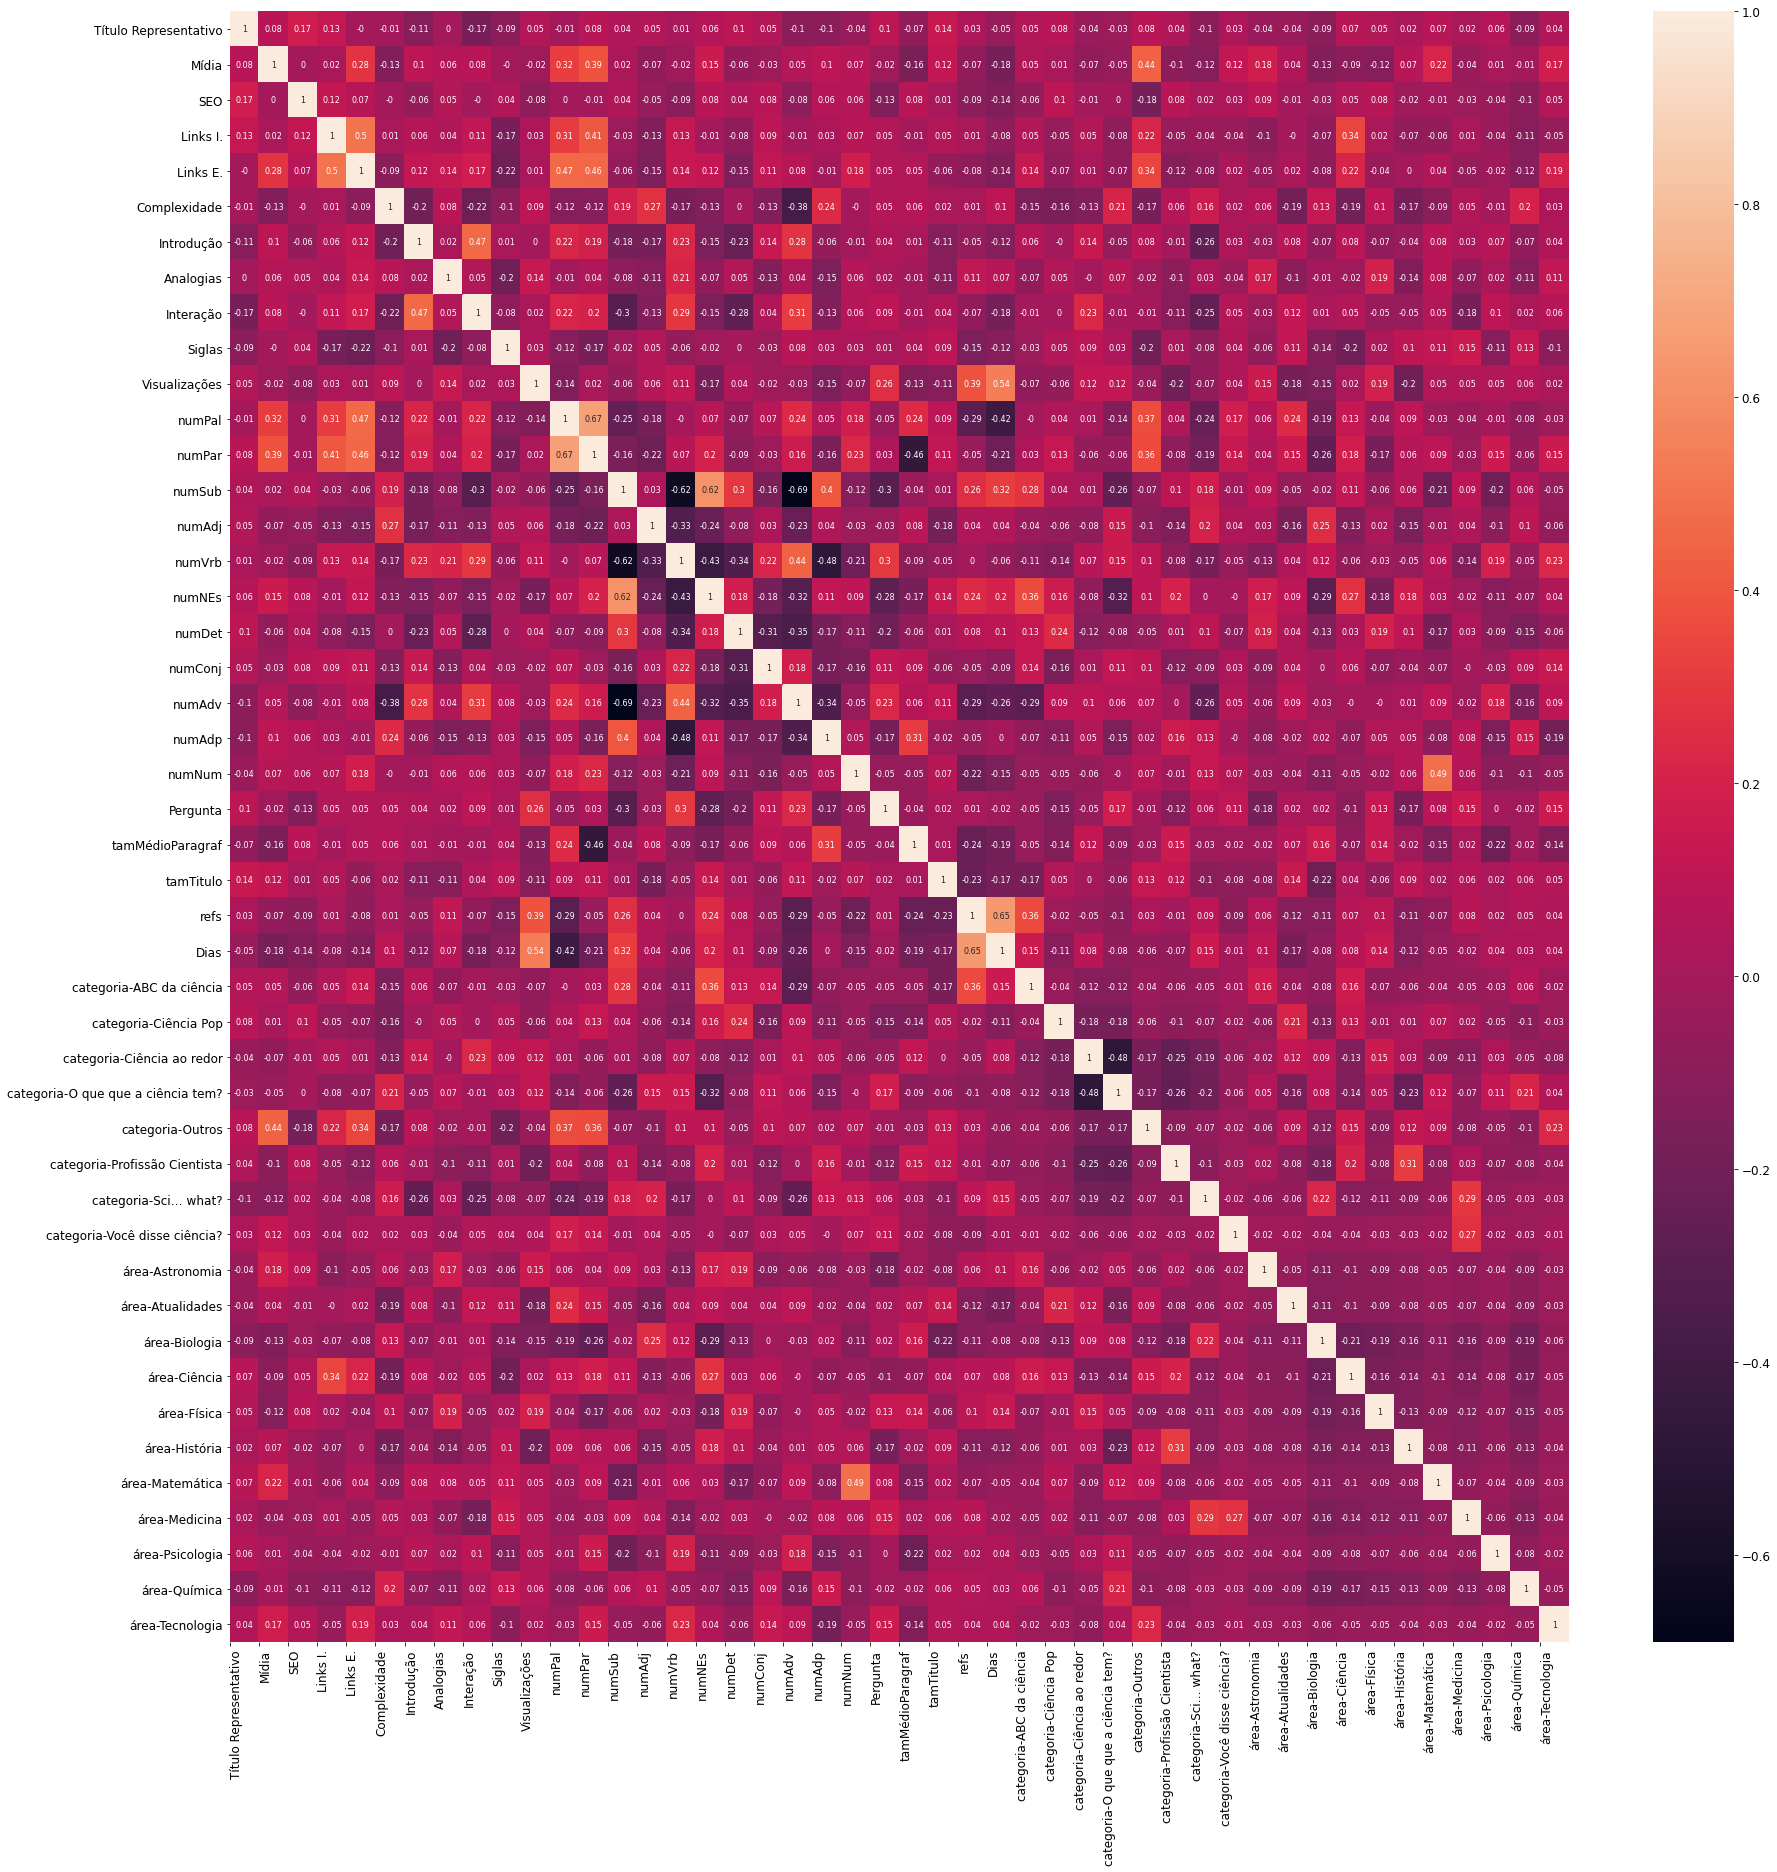

In [93]:
f, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(round(corr,2), annot=True, annot_kws={'fontsize':8})
kwargs = {'ha':'left'};
plt.xticks(range(len(corr)), corr.columns, rotation=90, **kwargs);

In [94]:
df.to_excel(r'C:\Users\Acer\Dropbox\UFABC\PGC\dataset-pgc-processed.xlsx', index = False)
y = df.pop('Visualizações')

x = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns)
print(x.head())
x_minmax = pd.DataFrame(MinMaxScaler().fit_transform(df), columns=df.columns)
print(x_minmax.head())

   Título Representativo     Mídia       SEO  Links I.  Links E.  \
0               0.318689 -0.452320 -2.614065 -0.419744 -0.666780   
1               0.318689  0.166875  0.382546 -0.419744 -0.544997   
2               0.318689  3.262854  0.382546 -0.419744  2.499560   
3               0.318689 -0.452320  0.382546 -0.419744 -0.544997   
4               0.318689 -0.452320  0.382546 -0.419744 -0.910344   

   Complexidade  Introdução  Analogias  Interação    Siglas    numPal  \
0     -1.294736    0.345033  -0.429970   0.541828  0.475486 -1.173014   
1     -1.294736    0.345033  -0.429970   0.541828 -2.103111 -0.628367   
2      0.265587    0.345033   2.325745   0.541828 -2.103111  0.481315   
3      0.265587    0.345033   2.325745   0.541828 -2.103111 -1.240003   
4      1.825910   -2.898275  -0.429970  -1.845603  0.475486 -0.555554   

     numPar    numSub    numAdj    numVrb    numNEs    numDet   numConj  \
0 -0.692157  0.723056  0.024656 -0.186833  1.798975 -0.380860  0.186699   
1 

In [95]:
#from pandas_profiling import ProfileReport
#profile = ProfileReport(x_minmax, title='Relatório PGC Scaller - Pandas Profiling', html={'style':{'full_width':True}})
#profile.to_file(output_file="Relatorio_PGC_Scaller.html")

In [96]:
teste = pd.DataFrame()
teste['DF Completo'] = df.loc[0]
teste['MinMax Scaller'] = x_minmax.loc[0]
teste['Standard Scaller'] = x.loc[0]
teste

,DF Completo,MinMax Scaller,Standard Scaller
Título Representativo,1.0000,1.000000,0.318689
Mídia,1.0000,0.000000,-0.452320
SEO,0.0000,0.000000,-2.614065
Links I.,0.0000,0.000000,-0.419744
Links E.,2.0000,0.036364,-0.666780
Complexidade,1.0000,0.000000,-1.294736
Introdução,1.0000,1.000000,0.345033
Analogias,0.0000,0.000000,-0.429970
Interação,1.0000,1.000000,0.541828
Siglas,1.0000,1.000000,0.475486


In [97]:
df.loc[0]

Título Representativo                   1.0000
Mídia                                   1.0000
SEO                                     0.0000
Links I.                                0.0000
Links E.                                2.0000
Complexidade                            1.0000
Introdução                              1.0000
Analogias                               0.0000
Interação                               1.0000
Siglas                                  1.0000
numPal                                345.0000
numPar                                  9.0000
numSub                                  0.3362
numAdj                                  0.0754
numVrb                                  0.1159
numNEs                                  0.1420
numDet                                  0.1594
numConj                                 0.0406
numAdv                                  0.0464
numAdp                                  0.0899
numNum                                  0.0116
Pergunta     

In [98]:
x_minmax.loc[0]

Título Representativo                 1.000000
Mídia                                 0.000000
SEO                                   0.000000
Links I.                              0.000000
Links E.                              0.036364
Complexidade                          0.000000
Introdução                            1.000000
Analogias                             0.000000
Interação                             1.000000
Siglas                                1.000000
numPal                                0.077048
numPar                                0.075000
numSub                                0.643729
numAdj                                0.338851
numVrb                                0.376988
numNEs                                0.717493
numDet                                0.425092
numConj                               0.454894
numAdv                                0.435754
numAdp                                0.248844
numNum                                0.128746
Pergunta     

In [99]:
x.loc[0]

Título Representativo                 0.318689
Mídia                                -0.452320
SEO                                  -2.614065
Links I.                             -0.419744
Links E.                             -0.666780
Complexidade                         -1.294736
Introdução                            0.345033
Analogias                            -0.429970
Interação                             0.541828
Siglas                                0.475486
numPal                               -1.173014
numPar                               -0.692157
numSub                                0.723056
numAdj                                0.024656
numVrb                               -0.186833
numNEs                                1.798975
numDet                               -0.380860
numConj                               0.186699
numAdv                               -0.453557
numAdp                               -1.369120
numNum                               -0.307090
Pergunta     

In [100]:
dados = [('Dataframe Completo',df),('MimMaxScaller',x_minmax),('StandardScaller',x)]
melhores_metodos = []

In [101]:
def testMethod(X, method):
    lista_MSE = []
    lista_R2 = []
    t=time.perf_counter()

    for i in range (100):
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
        reg = method
        reg.fit(x_train, y_train)
        y_pred = reg.predict(x_test)
        lista_MSE.append(mean_squared_error(y_test, y_pred))
        lista_R2.append(r2_score(y_test, y_pred))
        
    pred = reg.predict(X)
    #print("MSE médio: ", np.median(lista_MSE))
    #print("R2 médio: ", np.median(lista_R2))
    if np.median(lista_R2) > maior[0]:
            maior[0] = np.median(lista_R2)
            maior[1] = X.shape[1]
            maior[2] = np.median(lista_MSE)
            maior[3] = reg
    #print(round(time.perf_counter()-t,3), "segundos")
    return np.median(lista_R2), np.median(lista_MSE)

In [102]:
def testGrid(reg, param, dados):
    x_train, x_test, y_train, y_test = train_test_split(dados, y, test_size=0.25)
    gs = GridSearchCV(reg, parameters)
    gs.fit(x_train, y_train)
    y_pred = gs.predict(x_test)
    print(gs.best_estimator_)
    return gs.best_estimator_

In [103]:
def testPCA(method):
    for i in range (2,dado[1].shape[1]):
        #print("\nPCA:",i)
        dadosPCA = PCA(n_components=i).fit_transform(dado[1])
        #print(dadosPCA[0:5])
        #if i == 2:
        #    df_PCA2 = pd.DataFrame(dadosPCA)
        #    showPCA2(df_PCA2[0],df_PCA2[1])
        medias.append(testMethod(dadosPCA,method))

    #print("\nNO PCA")
    medias.append(testMethod(dado[1],method))
    #print(medias)
    print("\n")

In [104]:
def showPCA2(x,y):
    plt.scatter(x,y)
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x,p(x),"g--")
    plt.show()

Random Forest

In [105]:
t=time.perf_counter()

parameters = {'n_estimators':[10, 50, 100, 150, 200, 250, 300],
              'min_samples_leaf':[1, 5, 10, 15, 20]}

regressor = RandomForestRegressor()
medias_RF = []

maior = [-1,0,0,regressor]
for dado in dados:
    medias = []
    print(dado[0])
    testPCA(testGrid(regressor,parameters,dado[1]))
    print(f"Melhor desempenho:\nR2 score: {maior[0]}\nMSE: {maior[2]}\nPCA: {maior[1]}\n")
    maior[0] = -1
    maior[1] = 0
    maior[2] = 0
    if dado[0] == 'Dataframe Completo':
        melhores_metodos.append(maior[3])
    medias_RF.append(medias)
    
print(round(time.perf_counter()-t,3), "segundos")

Dataframe Completo
RandomForestRegressor(min_samples_leaf=20, n_estimators=10)


Melhor desempenho:
R2 score: 0.19923918750818054
MSE: 100478.5098701177
PCA: 45

MimMaxScaller
RandomForestRegressor(min_samples_leaf=10, n_estimators=10)


Melhor desempenho:
R2 score: 0.25916975044837404
MSE: 97438.97775703602
PCA: 45

StandardScaller
RandomForestRegressor(min_samples_leaf=10)


Melhor desempenho:
R2 score: 0.2473449668557089
MSE: 96982.80931466073
PCA: 45

1255.616 segundos


In [106]:
#print(medias_RF[2])
#print(medias_RF[0][9])

SVR linear

In [107]:
t=time.perf_counter()

parameters = {'epsilon':[0.05, 0.1, 0.15, 0.2, 0.25]}

regressor = SVR(kernel='linear')
medias_SVR = []

maior = [-1,0,0,regressor]
for dado in dados:
    medias = []
    print(dado[0])
    testPCA(testGrid(regressor,parameters,dado[1]))
    print(f"Melhor desempenho:\nR2 score: {maior[0]}\nMSE: {maior[2]}\nPCA: {maior[1]}\n")
    maior[0] = -1
    maior[1] = 0
    maior[2] = 0
    if dado[0] == 'Dataframe Completo':
        melhores_metodos.append(maior[3])
    medias_SVR.append(medias)
    
print(round(time.perf_counter()-t,3), "segundos")

Dataframe Completo
SVR(epsilon=0.25, kernel='linear')


Melhor desempenho:
R2 score: 0.24309482851386782
MSE: 103823.66407131325
PCA: 2

MimMaxScaller
SVR(epsilon=0.25, kernel='linear')


Melhor desempenho:
R2 score: 0.0027189659972715052
MSE: 134659.88165888
PCA: 39

StandardScaller
SVR(epsilon=0.25, kernel='linear')


Melhor desempenho:
R2 score: 0.13610794329055242
MSE: 108632.068308047
PCA: 42

787.553 segundos


In [108]:
#print(medias_SVR[2])
#print(medias_SVR[0][9])

Regressão Linear

In [109]:
t=time.perf_counter()

parameters = {'normalize':[False, True]}

regressor = LinearRegression()
medias_RL = []

maior = [-1,0,0,regressor]
for dado in dados:
    medias = []
    print(dado[0])
    testPCA(testGrid(regressor,parameters,dado[1]))
    print(f"Melhor desempenho:\nR2 score: {maior[0]}\nMSE: {maior[2]}\nPCA: {maior[1]}\n")
    maior[0] = -1
    maior[1] = 0
    maior[2] = 0
    if dado[0] == 'Dataframe Completo':
        melhores_metodos.append(maior[3])
    medias_RL.append(medias)
    
print(round(time.perf_counter()-t,3), "segundos")

Dataframe Completo
LinearRegression()


Melhor desempenho:
R2 score: 0.26708468094180854
MSE: 98144.19636629167
PCA: 11

MimMaxScaller
LinearRegression()


Melhor desempenho:
R2 score: 0.2096769509993171
MSE: 108007.28859483387
PCA: 10

StandardScaller
LinearRegression()


Melhor desempenho:
R2 score: 0.15672330627851905
MSE: 110973.30342404546
PCA: 11

33.392 segundos


In [110]:
#print(medias_RL[2])
#print(medias_RL[0][9])

MLP

In [111]:
t=time.perf_counter()

parameters = {'hidden_layer_sizes':[10, 20, 50, 100, 150, 200, 250, 300]}

regressor = MLPRegressor()
medias_MLP = []

maior = [-1,0,0,regressor]
for dado in dados[:-1]:
    medias = []
    print(dado[0])
    testPCA(testGrid(regressor,parameters,dado[1]))
    print(f"Melhor desempenho:\nR2 score: {maior[0]}\nMSE: {maior[2]}\nPCA: {maior[1]}\n")
    maior[0] = -1
    maior[1] = 0
    maior[2] = 0
    if dado[0] == 'Dataframe Completo':
        melhores_metodos.append(maior[3])
    medias_MLP.append(medias)
    
print(round(time.perf_counter()-t,3), "segundos")

Dataframe Completo
MLPRegressor(hidden_layer_sizes=50)


Melhor desempenho:
R2 score: 0.2542057716588979
MSE: 102399.80487220109
PCA: 45

MimMaxScaller
MLPRegressor(hidden_layer_sizes=300)


Melhor desempenho:
R2 score: -0.6036189001934597
MSE: 212014.0711523118
PCA: 45

3218.452 segundos


In [112]:
#print(medias_MLP[2])
#print(medias_MLP[0][9])

KNN

In [113]:
t=time.perf_counter()

parameters = {'n_neighbors':[1, 3, 5, 15, 25, 35, 45, 55],
             'weights':['uniform','distance'],
             'algorithm':['auto','ball_tree','kd_tree','brute']}

regressor = KNeighborsRegressor()
medias_KNN = []

maior = [-1,0,0,regressor]
for dado in dados:
    medias = []
    print(dado[0])
    testPCA(testGrid(regressor,parameters,dado[1]))
    print(f"Melhor desempenho:\nR2 score: {maior[0]}\nMSE: {maior[2]}\nPCA: {maior[1]}\n")
    maior[0] = -1
    maior[1] = 0
    maior[2] = 0
    if dado[0] == 'Dataframe Completo':
        melhores_metodos.append(maior[3])
    medias_KNN.append(medias)
    
print(round(time.perf_counter()-t,3), "segundos")

Dataframe Completo
KNeighborsRegressor(n_neighbors=25)


Melhor desempenho:
R2 score: 0.1924651872769652
MSE: 109771.46237777776
PCA: 24

MimMaxScaller
KNeighborsRegressor(n_neighbors=15, weights='distance')


Melhor desempenho:
R2 score: 0.1438567693633777
MSE: 103206.11089418521
PCA: 8

StandardScaller
KNeighborsRegressor(n_neighbors=15, weights='distance')


Melhor desempenho:
R2 score: 0.14780390203284216
MSE: 110621.72570747617
PCA: 11

59.108 segundos


In [114]:
#print(medias_KNN[2])
#print(medias_KNN[2][10])

In [115]:
#melhores_metodos = [RandomForestRegressor, SVR Linear, LinearRegression, MLPRegressor, KNeighborsRegressor]
num = 0
predictions = []
for metodo in melhores_metodos:
    predictions.append(metodo.predict(df))
print(melhores_metodos[num])
i = 0
for view in y:
    #print("Predict:",int(round(predictions[num][i])),"\tReal:",view)
    i=i+1

    
print("R2:", r2_score(y, predictions[num]))
print("MSE:", mean_squared_error(y, predictions[num]))
print("Erro médio:", np.mean(np.abs((predictions[num]-y)/y)))

RandomForestRegressor(min_samples_leaf=20, n_estimators=10)
R2: 0.2724047690636423
MSE: 96578.34349012887
Erro médio: 1.6693965323266031


In [116]:
total = round(time.perf_counter()-t_total,3)
print(total, "segundos")
print(total/60, "minutos")

6678.997 segundos
111.31661666666668 minutos


In [117]:
dfcomp_minmax_std = 0    # 0 = df_completo, 1 = minmax scaller, 2 = std_scaller
r2_mse = 0               # 0 = r2 score, 1 = MSE

linharfR2 = []
linhasvrR2 = []
linharlR2 = []
linhamlpR2 = []
linhaknnR2 = []
pcas = []
for i in range (42):
    linharfR2.append(medias_RF[dfcomp_minmax_std][i][r2_mse])
    linhasvrR2.append(medias_SVR[dfcomp_minmax_std][i][r2_mse])
    linharlR2.append(medias_RL[dfcomp_minmax_std][i][r2_mse])
    linhamlpR2.append(medias_MLP[dfcomp_minmax_std][i][r2_mse])
    linhaknnR2.append(medias_KNN[dfcomp_minmax_std][i][r2_mse])
    pcas.append(i+2)
    
    
#print(pcas)

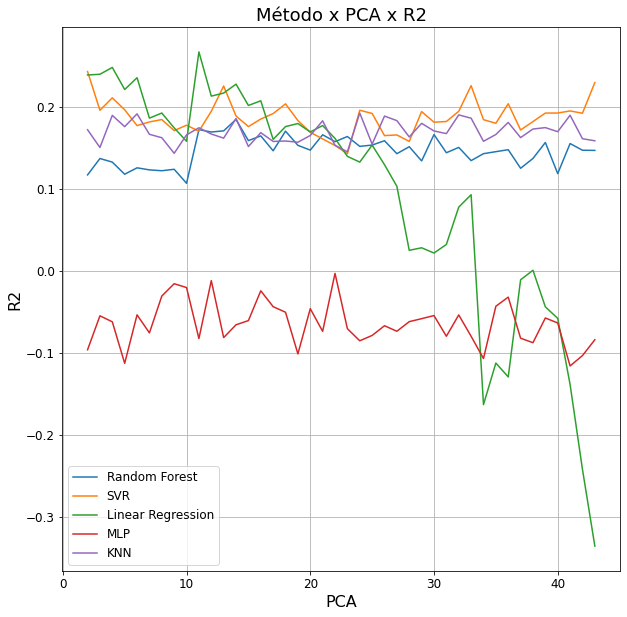

In [120]:
plt.grid()
sns.lineplot(x=pcas, y=linharfR2)
sns.lineplot(x=pcas, y=linhasvrR2)
sns.lineplot(x=pcas, y=linharlR2)
sns.lineplot(x=pcas, y=linhamlpR2)
sns.lineplot(x=pcas, y=linhaknnR2)
plt.title('Método x PCA x R2')
plt.xlabel('PCA')
plt.ylabel('R2')
plt.legend(['Random Forest','SVR','Linear Regression','MLP','KNN'])
plt.savefig('comparacao1.pdf')